# Dynamic Programming For Cutting Problems（切割问题，切成几块能卖上最高的价钱）

In [45]:
from collections import defaultdict#默认字典，即当键不存在时，给定这个键一个默认值，键存在时值不变
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
price=defaultdict(int)#默认值
for i, p in enumerate(original_price):#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    price[i+1] = p
assert price[1] == 1#检查条件，不符合就终止运行，感觉在这个程序里每必要加这一句啊
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30})

In [46]:
def r1(n):#这是一个递归函数，能够返回给定长度的瓷砖，能卖得的最高价钱,这个函数运行的速度太慢，需要一级一级拆分，还不知道具体切割方案，只得到能卖的最大价格
    return max(
    [price[n]]+[r1(i)+r1(n-i) for i in range(1,n)]
    )

In [47]:
r1(4)

10

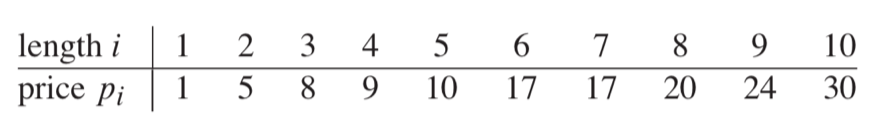

In [48]:
solution={}
## for a given length N, we set the corrsponding split parts
## solution = 
# {
#     4: (2, 2)#4为长度，(2, 2)为分块策略
# }

In [49]:
from functools import lru_cache

In [50]:
@lru_cache(maxsize=2**10)#为了使程序运行变快，在functools这个模块中，有lru_cache这个一个神奇的装饰器存在。functools.lru_cache的作用主要是用来做缓存，他能把相对耗时的函数结果进行保存，避免传入相同的参数重复计算。同时，缓存并不会无限增长，不用的缓存会被释放。
def r(n):#此函数能够给出切割方案，以及能卖出的最大价格，结果存储在solution 中
    max_price,split_point=max(
    [(price[n],0)]+[(r(i)+r(n-i),i) for i in range(1,n)],key=lambda x:x[0]
    )
    solution[n]=(split_point,n-split_point)
    return max_price

In [51]:
r(125)

373

In [52]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [53]:
def func_1(n):#
    for i in range(n):# for i in range () 就是给i赋值，从0到n-1
        print(n)

In [54]:
import time

In [55]:
def call_time(func_1, arg): # (脚手架程序),判断一个程序运行科多久 
    start = time.time()#time time() 返回当前时间的时间戳
    func_1(arg)
    print('used time: {}'.format(time.time() - start))

In [56]:
arg=10
call_time(func_1, arg)

10
10
10
10
10
10
10
10
10
10
used time: 0.003998994827270508


In [57]:
print("time.time(): %f "%time.time())#学习一下time.time的用法,%f格式化浮点数字
print(time.localtime(time.time()))
print(time.asctime(time.localtime(time.time())))

time.time(): 1557133404.659256 
time.struct_time(tm_year=2019, tm_mon=5, tm_mday=6, tm_hour=17, tm_min=3, tm_sec=24, tm_wday=0, tm_yday=126, tm_isdst=0)
Mon May  6 17:03:24 2019


In [58]:
from functools import wraps#为了避免写了装饰器之后函数名等属性发生变化

In [59]:
function_called_time = defaultdict(int)
def get_call_time(func):
    @wraps(func)#加上这个，是为了不改变被装饰函数的帮助信息？
    def _inner(arg): ## *args, **kwargs  写上*可以匹配不止一个参数
        """It's inner function"""#三个双引号就能表示函数的帮助信息，是么？
        global function_called_time#如果你想要为一个定义在函数外的变量赋值，那么你就得告诉Python这个变量名不是局部的，而是 全局 的
        function_called_time[func.__name__] += 1#为了讲解装饰器的作用，增加了打印函数调用次数的功能
        result = func(arg)
        print('function called time is : {}'.format(function_called_time[func.__name__]))
        return result
    return _inner

In [60]:
call_time(func_1, 10)

10
10
10
10
10
10
10
10
10
10
used time: 0.003995418548583984


In [61]:
func_1 = get_call_time(func_1) ## => @ ( decorator )

In [62]:
func_1(10) # we get the new func 1 😀

10
10
10
10
10
10
10
10
10
10
function called time is : 1


In [63]:
@get_call_time
def func_1(n):
    """
    @param n: is the number of customers#这行和下一行加在一起什么意思？是给函数加帮助信息么？
    @return int: the customers value point
    """
    for i in range(n):
        print(n)
    return 0

In [64]:
help(func_1)

Help on function func_1 in module __main__:

func_1(n)
    @param n: is the number of customers#这行和下一行加在一起什么意思？是给函数加帮助信息么？
    @return int: the customers value point



In [65]:
def memo(func):#作用相当于@lru_cache(maxsize=2**10)？
    cache = {}
    @wraps(func)
    def _wrap(n): ## ? *args, **kwargs
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap

In [66]:
@memo
def r(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    
    return max_price

In [67]:
r(100)

300


Dynamic Programming¶
不断查表的意思
分析子问题的重复性
子问题进行存储
Solution 要进行解析

In [68]:
solution[18]

(2, 16)

In [69]:
solution[2]

(0, 2)

In [70]:
solution[16]

(6, 10)

In [71]:
solution[6]

(0, 6)

In [72]:
solution[10]

(0, 10)

In [73]:
#一下是对Solution进行解析
def not_cut(split): return split == 0

def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    
    if not_cut(left): return [right]

    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)

In [74]:
parse_solution(18, solution)

[2, 6, 10]

Edit Distance

In [75]:
solution = {}

In [76]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [83]:
edit_distance('A', 'ABCD')

3

In [84]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('A', 'ABCD'): 'ADD D'}

Part1-2: Finish the Solution Parse Part of Edit-Distance这一部分还不会啊

Part 3: Answer following questions:
Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?
Ans:因为有很多重复的子问题，所以需要不断查表，查表可以大大减小计算机的负载。不断查表能够得到最优解，不像神经网络得到的是近似解。

Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?
Ans:机器学习的方法首先需要有一定数量的训练样本，而对于一些问题不一定有足够的样本。另外机器学习需要一定的时间进行模型训练。对于一些问题用不断查表的方法能够很快得到最优解。

Can you catch up at least 3 problems which could solved by Dynamic Programming?
Ans:
外卖路线
编辑距离
切割问题的最优解
Can you catch up at least 3 problems wich could sloved by Edit Distance?
Ans：
文章查重
输入法模糊匹配
语音生成结果好坏的判断

Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.
Ans
子问题具有重复性：子问题之间有重叠，需要重复计算一样的东西
子问题进行存储：不存储的话，没办法得到解决方案
对存储结果进行解析：得到最终的解决方案

What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)
Ans:没有标准模型。
    存在维数灾难问题，